In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# File paths (use raw strings to avoid backslash issues)
input_file = "C:\\Users\\Hp\\OneDrive\\Documents\\project\\SRU_Project\\data\\IN_Table.csv"
output_file = "C:\\Users\\Hp\\OneDrive\\Documents\\project\\SRU_Project\\data\\OUT_Table.csv"

# Read data
input_data = pd.read_csv(input_file).to_numpy()
output_data = pd.read_csv(output_file).to_numpy()

# Split into inputs and outputs
X = input_data
Y = output_data

In [11]:
# Split into train (70%) and validation (30%)
np.random.seed(40)
indices = np.random.permutation(len(Y))
train_size = int(0.7 * len(Y))
train_idx, valid_idx = indices[:train_size], indices[train_size:]

X_train, X_valid = X[train_idx], X[valid_idx]
Y_train, Y_valid = Y[train_idx], Y[valid_idx]

In [12]:
# Train two separate Random Forest models (one for each output)
model1 = RandomForestRegressor(n_estimators=70, random_state=30)
model2 = RandomForestRegressor(n_estimators=70, random_state=30)

model1.fit(X_train, Y_train[:, 0])  # First output variable
model2.fit(X_train, Y_train[:, 1])  # Second output variable

,n_estimators,70
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Predict
Y_pred = np.zeros_like(Y_valid)
Y_pred[:, 0] = model1.predict(X_valid)
Y_pred[:, 1] = model2.predict(X_valid)

In [14]:
# Evaluation
mse = mean_squared_error(Y_valid, Y_pred, multioutput='raw_values')
r2 = r2_score(Y_valid, Y_pred, multioutput='raw_values')

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: [0.22421332 0.39016953]
R-squared: [0.76641424 0.61428458]


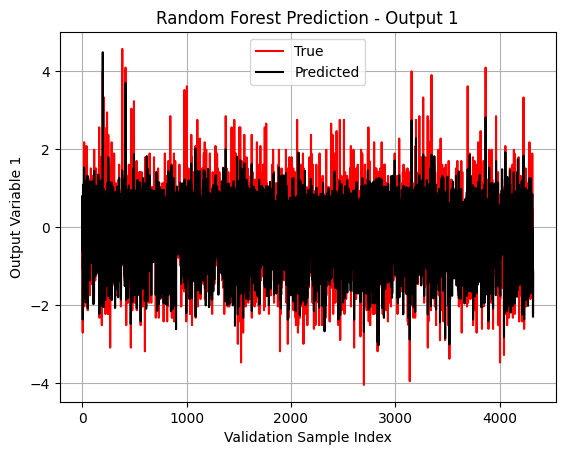

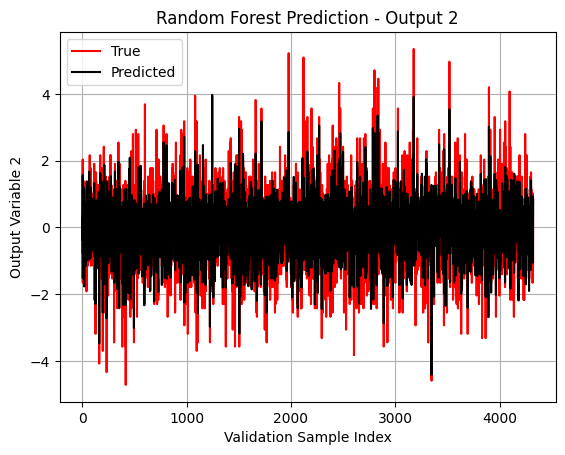

In [15]:
# Plot: True vs Predicted
for i in range(Y.shape[1]):
    plt.figure()
    plt.plot(Y_valid[:, i], 'r', label="True")
    plt.plot(Y_pred[:, i], 'k', label="Predicted")
    plt.xlabel("Validation Sample Index")
    plt.ylabel(f"Output Variable {i+1}")
    plt.title(f"Random Forest Prediction - Output {i+1}")
    plt.legend()
    plt.grid(True)
    plt.show()